# MACHINE LEARNING INTERN @CodSoft

AUTHOR - MUSKAN

TASK 2:
CREDIT CARD FRAUD DETECTION

Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or, legitimate.

The Data used in the task is taken from kaggle as the link is provided by CodeSoft




In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,368759.000000,3.687590e+05,368758.000000,368758.000000,368757.000000,368757.000000,3.687570e+05,3.687570e+05,368757.000000,368757.000000,368757.000000
mean,92199.210360,4.180637e+17,70.301864,48797.416628,38.544111,-90.208976,8.942607e+04,1.352425e+09,38.544299,-90.208564,0.006397
std,53243.097293,1.309953e+18,153.877051,26875.279374,5.072082,13.742874,3.028562e+05,2.250758e+07,5.107210,13.755225,0.079726
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671575,0.000000
25%,46094.500000,1.800400e+14,9.642500,26237.000000,34.668900,-96.798000,7.410000e+02,1.330081e+09,34.754144,-96.882100,0.000000
50%,92189.000000,3.519607e+15,47.510000,48174.000000,39.371600,-87.476900,2.443000e+03,1.371857e+09,39.371306,-87.420355,0.000000
75%,138284.000000,4.635331e+15,83.300000,72011.000000,41.940400,-80.158000,2.047800e+04,1.374636e+09,41.961092,-80.232236,0.000000
max,186295.000000,4.992346e+18,15034.180000,99783.000000,66.693300,-67.950300,2.906700e+06,1.377427e+09,67.510267,-66.952352,1.000000


In [56]:
print(train.shape)
print(test.shape)

(182463, 23)
(186296, 23)


In [57]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


          Unnamed: 0        cc_num            amt            zip  \
count  368759.000000  3.687590e+05  368758.000000  368758.000000   
mean    92199.210360  4.180637e+17      70.301864   48797.416628   
std     53243.097293  1.309953e+18     153.877051   26875.279374   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%     46094.500000  1.800400e+14       9.642500   26237.000000   
50%     92189.000000  3.519607e+15      47.510000   48174.000000   
75%    138284.000000  4.635331e+15      83.300000   72011.000000   
max    186295.000000  4.992346e+18   15034.180000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  368757.000000  368757.000000  3.687570e+05  3.687570e+05   
mean       38.544111     -90.208976  8.942607e+04  1.352425e+09   
std         5.072082      13.742874  3.028562e+05  2.250758e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.798000  7.410000e+02  1

In [58]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
186291      186291   2020-08-25 10:31:45  2383461948823908   
186292      186292   2020-08-25 10:31:55    30328384440870   
186293      186293   2020-08-25 10:32:16   342952484382519   
186294      186294   2020-08-25 10:32:58  4740713119940984   
186295      186295   2020-08-25 10:33:07     4561892980175   

                                    merchant        category    amt    first  \
0                      fraud_Kirlin and Sons   personal_care   2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care  2

In [59]:
train.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
182458      182458   2019-04-05 15:11:24  4514242065619750   
182459      182459   2019-04-05 15:11:48  3564182536169293   
182460      182460   2019-04-05 15:12:28   342360239917375   
182461      182461   2019-04-05 15:12:50  4904681492230012   
182462      182462   2019-04-05 15:13:20  4302480582202074   

                                      merchant        category     amt  \
0                   fraud_Rippin, Kub and Mann        misc_net    4.97   
1              fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   
2

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [61]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)


In [62]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [63]:
print(train.shape)
print(test.shape)
print(data.shape)

(182463, 23)
(186296, 23)
(368759, 23)


In [64]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       515         8    4.97       0     26   
1           1      630423337322       241         4  107.23       0     46   
2           2    38859492057661       390         0  220.11       1     12   
3           3  3534093764340240       360         2   45.00       1     25   
4           4   375534208663984       297         9   41.96       1     44   

       zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654.0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160.0  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252.0  42.1

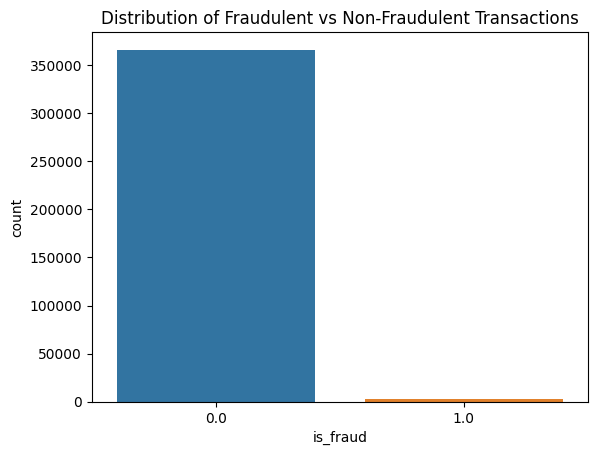

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [66]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

182463
0


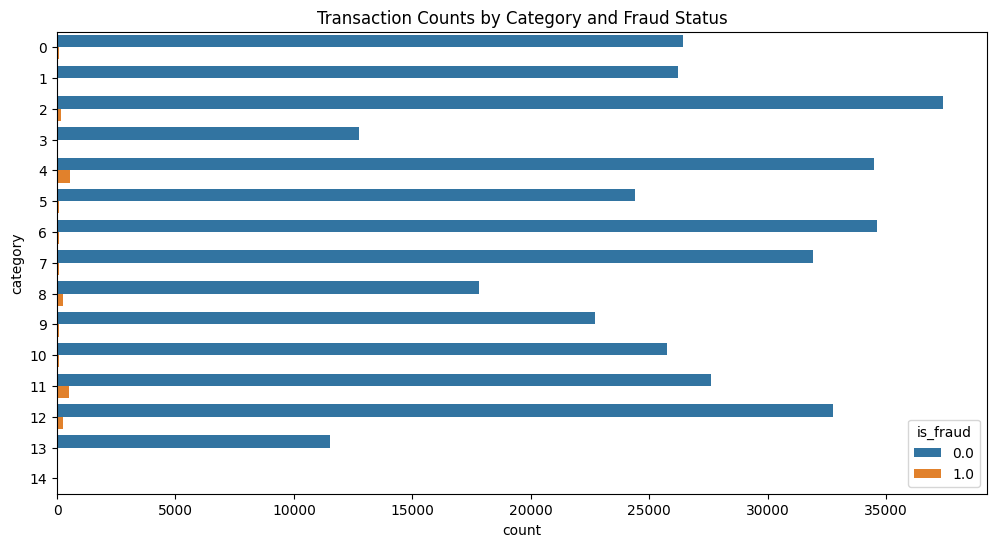

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

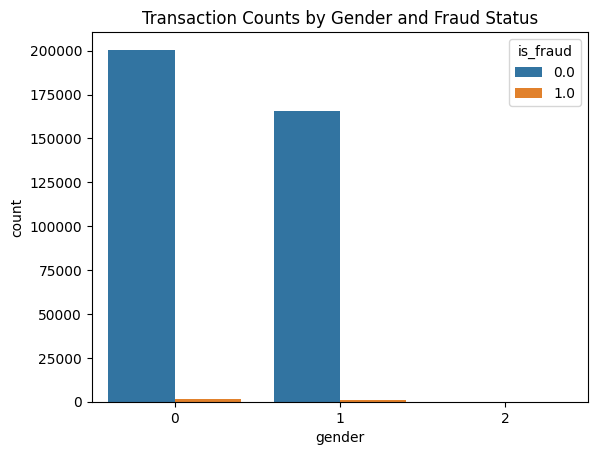

In [68]:
## The 0 represent male and 1 represent female
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

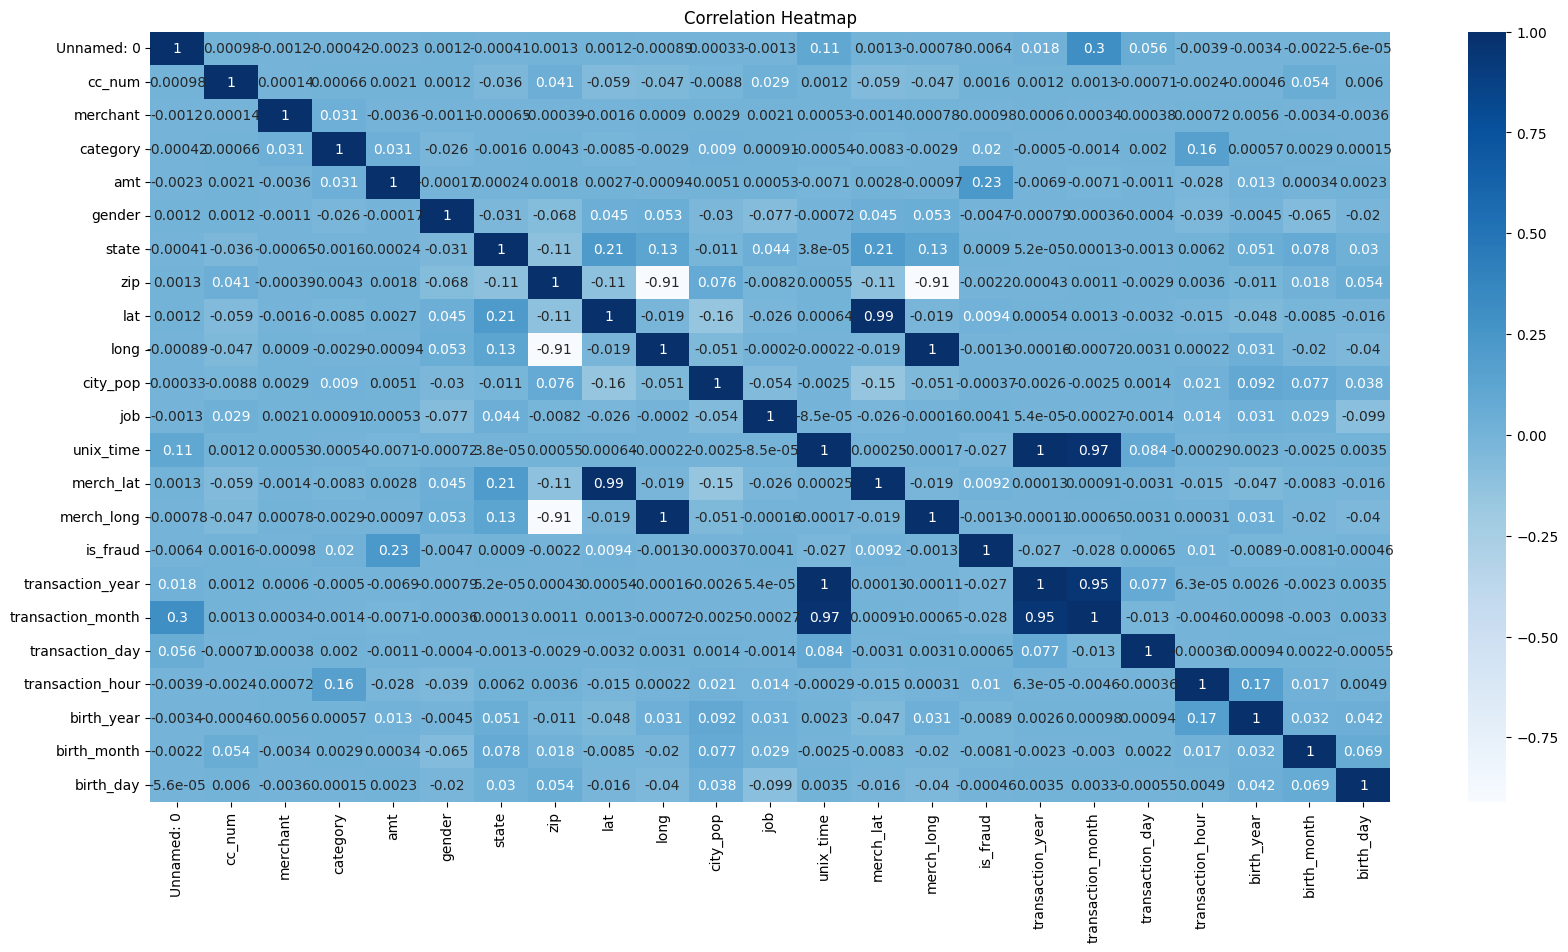

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [70]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

In [73]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model with default parameters
log_model = LogisticRegression()

# Fit the model to the training data
log_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_model.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

[[15  0]
 [ 0 10]]
Accuracy: 1.0


In [74]:
# Training the model with DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
tree_model = DecisionTreeClassifier()

# Fit the classifier to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

[[13  2]
 [ 0 10]]
Accuracy: 0.92


In [76]:
# Training the model with RandomForest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.82      0.90      0.86        10

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

[[13  2]
 [ 1  9]]
Accuracy: 0.88
